# Import Package

In [ ]:
#Import Package

import math
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance as yfin
import random

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model
from keras.layers import LSTM, Dense
from keras.layers import Dropout
from keras import optimizers

# Import Data




In [ ]:
df = pd.read_csv('/content/BBCA.JK(real).csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.853516,0
2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.467773,35956000
2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.046387,72358000
2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.306641,51465000
2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.919922,73438000
...,...,...,...,...,...,...
2024-01-26,9400.0,9450.0,9300.0,9350.0,9139.393555,78977300
2024-01-29,9400.0,9550.0,9375.0,9550.0,9334.888672,73452800
2024-01-30,9500.0,9650.0,9475.0,9650.0,9432.635742,73136400


# Exploratory Data Analysis



> Describing the Head



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2019-01-01 to 2024-02-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1255 non-null   float64
 1   High       1255 non-null   float64
 2   Low        1255 non-null   float64
 3   Close      1255 non-null   float64
 4   Adj Close  1255 non-null   float64
 5   Volume     1255 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.6 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,7134.159363,7196.561753,7069.430279,7132.908367,6672.570682,8.337875e+07
std,1288.271714,1292.025532,1290.952913,1293.099843,1391.115036,5.401298e+07
min,4450.000000,4800.000000,4325.000000,4430.000000,3992.931396,0.000000e+00
25%,6070.000000,6110.000000,6010.000000,6062.500000,5553.224853,5.358565e+07
50%,6815.000000,6880.000000,6735.000000,6790.000000,6184.970703,7.198820e+07
75%,8362.500000,8475.000000,8312.500000,8375.000000,7956.755371,9.833840e+07
max,9775.000000,9775.000000,9675.000000,9750.000000,9530.383789,7.228279e+08




> Checking Null Data or Missing Values



In [ ]:
missing_values=pd.isnull(df['Close']).sum()
print("Jumlah Data Null: ", missing_values)

Jumlah Data Null:  0




> Finding the trend or pattern



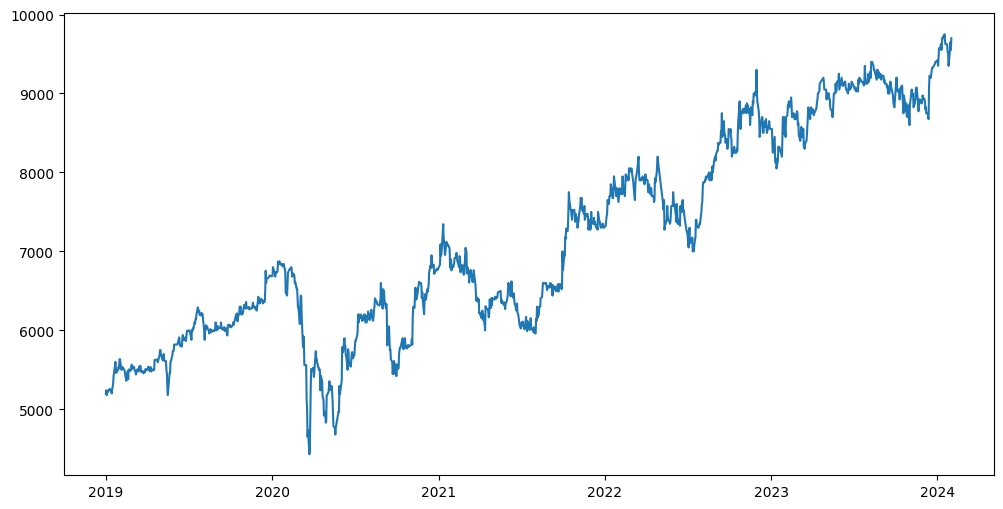

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])

In [ ]:
## Taking year from index
df.index = pd.to_datetime(df.index)
df['Year'] = df.index.year
df

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2019-01-01,5200.0,5200.0,5200.0,5200.0,4629.853516,0,2019
2019-01-02,5200.0,5245.0,5200.0,5240.0,4665.467773,35956000,2019
2019-01-03,5200.0,5220.0,5115.0,5180.0,4612.046387,72358000,2019
2019-01-04,5175.0,5205.0,5125.0,5205.0,4634.306641,51465000,2019
2019-01-07,5265.0,5325.0,5245.0,5245.0,4669.919922,73438000,2019
...,...,...,...,...,...,...,...
2024-01-26,9400.0,9450.0,9300.0,9350.0,9139.393555,78977300,2024
2024-01-29,9400.0,9550.0,9375.0,9550.0,9334.888672,73452800,2024
2024-01-30,9500.0,9650.0,9475.0,9650.0,9432.635742,73136400,2024


# Pre-Processing Dataset



> Pick only The Close Column



In [ ]:
df_close=df[['Close']]
df_close

,Close
Date,
2019-01-01,5200.0
2019-01-02,5240.0
2019-01-03,5180.0
2019-01-04,5205.0
2019-01-07,5245.0
...,...
2024-01-26,9350.0
2024-01-29,9550.0
2024-01-30,9650.0


In [ ]:
df_close.shape

(1255, 1)

In [ ]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2019-01-01 to 2024-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1255 non-null   float64
dtypes: float64(1)
memory usage: 19.6 KB




> Applying Standard Scaler



In [ ]:
scaler=StandardScaler()
df_close['Close']=scaler.fit_transform(df_close[['Close']])
df_close

<ipython-input-11-07c0548f78fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Close']=scaler.fit_transform(df_close[['Close']])


,Close
Date,
2019-01-01,-1.495383
2019-01-02,-1.464437
2019-01-03,-1.510855
2019-01-04,-1.491514
2019-01-07,-1.460569
...,...
2024-01-26,1.715239
2024-01-29,1.869968
2024-01-30,1.947332


In [ ]:
df_close.describe()

,Close
count,1.255000e+03
mean,-2.717614e-16
std,1.000399e+00
min,-2.091088e+00
25%,-8.281148e-01
50%,-2.652889e-01
75%,9.609365e-01
max,2.024697e+00




> Analisis AutoKorelasi



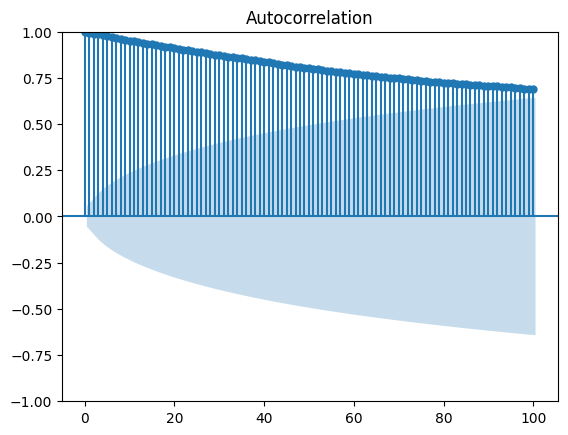

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_close['Close'],lags=100)
plt.show()



> Applying Lag to the Dataset



In [ ]:
# Menentukan jumlah lag yang diinginkan
num_lags = 2

# Membuat kolom-kolom yang merupakan lag dari kolom 'close'
for i in range(1, num_lags + 1):
    df_close[f'lag_{i}'] = df_close['Close'].shift(i)
df_close

<ipython-input-14-cf65664d0008>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close[f'lag_{i}'] = df_close['Close'].shift(i)
<ipython-input-14-cf65664d0008>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close[f'lag_{i}'] = df_close['Close'].shift(i)


,Close,lag_1,lag_2
Date,,,
2019-01-01,-1.495383,NaN,NaN
2019-01-02,-1.464437,-1.495383,NaN
2019-01-03,-1.510855,-1.464437,-1.495383
2019-01-04,-1.491514,-1.510855,-1.464437
2019-01-07,-1.460569,-1.491514,-1.510855
...,...,...,...
2024-01-26,1.715239,1.831286,1.850627
2024-01-29,1.869968,1.715239,1.831286
2024-01-30,1.947332,1.869968,1.715239


In [ ]:
df_close=df_close.dropna()
df_close

,Close,lag_1,lag_2
Date,,,
2019-01-03,-1.510855,-1.464437,-1.495383
2019-01-04,-1.491514,-1.510855,-1.464437
2019-01-07,-1.460569,-1.491514,-1.510855
2019-01-08,-1.464437,-1.460569,-1.491514
2019-01-09,-1.452832,-1.464437,-1.460569
...,...,...,...
2024-01-26,1.715239,1.831286,1.850627
2024-01-29,1.869968,1.715239,1.831286
2024-01-30,1.947332,1.869968,1.715239


In [ ]:
df_close.tail(6)

,Close,lag_1,lag_2
Date,,,
2024-01-25,1.831286,1.850627,1.908650
2024-01-26,1.715239,1.831286,1.850627
2024-01-29,1.869968,1.715239,1.831286
2024-01-30,1.947332,1.869968,1.715239
2024-01-31,1.869968,1.947332,1.869968
2024-02-01,1.986014,1.869968,1.947332




> Split Dataset



In [ ]:
data_train = df_close[:int(0.85*len(df_close))]
data_valid = df_close[int(0.85*len(df_close)):]

print("Data train shape :", data_train.shape)
print("Data valid shape  :", data_valid.shape)

Data train shape : (1065, 3)
Data valid shape  : (188, 3)


<function matplotlib.pyplot.show(close=None, block=None)>

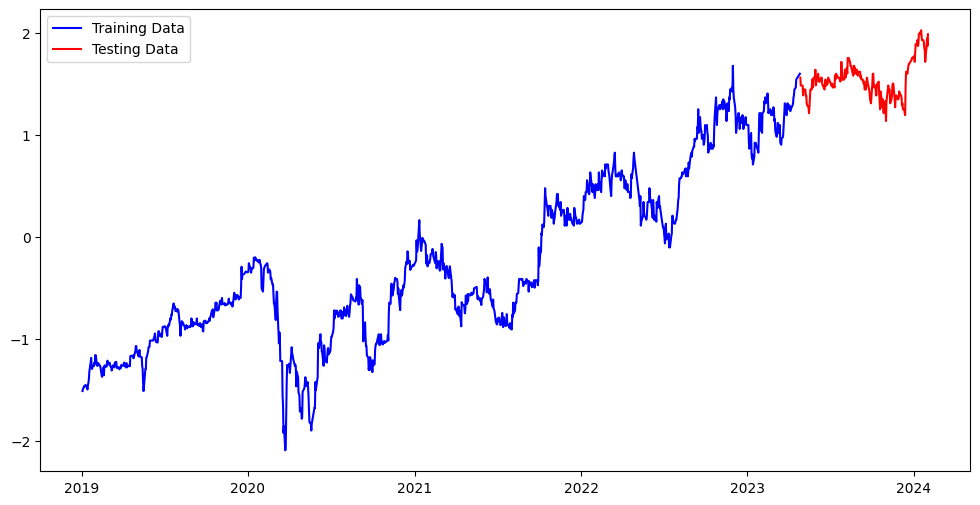

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data_train['Close'],label='Training Data',color='blue')
plt.plot(data_valid['Close'],label='Testing Data',color='red')
plt.legend()
plt.show



> Splitting Data Training and Valid (X and Y)



In [ ]:
x_train = data_train.iloc[:, 1:]
y_train = data_train.iloc[:,0]

x_valid = data_valid.iloc[:, 1:]
y_valid = data_valid.iloc[:,0]

In [ ]:
x_train

,lag_1,lag_2
Date,,
2019-01-03,-1.464437,-1.495383
2019-01-04,-1.510855,-1.464437
2019-01-07,-1.491514,-1.510855
2019-01-08,-1.460569,-1.491514
2019-01-09,-1.464437,-1.460569
...,...,...
2023-04-13,1.367099,1.309076
2023-04-14,1.386441,1.367099
2023-04-17,1.444464,1.386441


# Define Function

In [ ]:
##Plot Training Prediksi
def plot_prediction_train(y_true, y_pred):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index,y_true, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index,y_pred, label=f'Hasil Prediksi ', color='red')

    # Menambahkan judul dan label
    plt.title(f'Prediksi (Data Training)', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Nilai', fontsize=12)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menampilkan plot
    plt.show()

In [ ]:
##Plot Testing
def plot_prediction_test(y_true, y_pred):
    """
    Plot hasil prediksi dan nilai sebenarnya.

    Parameters:
    - y_true (pandas.Series): Seri nilai sebenarnya.
    - y_pred (pandas.Series): Seri hasil prediksi.
    - dataset_name (str): Nama dataset (contoh: 'Validasi' atau 'Test').

    Returns:
    - None
    """
    plt.figure(figsize=(12, 6))

    # Plot nilai sebenarnya
    plt.plot(y_true.index,y_true, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

    # Plot hasil prediksi
    plt.plot(y_true.index,y_pred, label=f'Hasil Prediksi ', color='red')

    # Menambahkan judul dan label
    plt.title(f'Prediksi (Data Testing)', fontsize=14)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Nilai', fontsize=12)

    # Menambahkan legenda
    plt.legend(fontsize=12)

    # Menampilkan plot
    plt.show()

In [ ]:
## MAE
def calculate_mape(Y_test, y_pred_test):
  for i in range (len(Y_test)):
    mape =np.abs((Y_test[i] - y_pred_test[i]) / Y_test[i])
  mape=mape/(len(Y_test))*100
  return mape

def calculate_mae(Y_test, y_pred):
  for i in range (len(Y_test)):
    mae = np.abs((Y_test[i] - y_pred[i]) / Y_test[i])
  mae=mae/len(Y_test)
  return mae

def calculate_mse(Y_test, y_pred):
  for i in range (len(Y_test)):
    mse = ((Y_test[i] - y_pred[i]) * (Y_test[i]-y_pred[i]))
  mse=mse/len(Y_test)
  return mse

# Training Model

# Model LSTM (tanpa GWO)



1.   Training



In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
model = Sequential()
model.add(LSTM(128, input_shape=(x_train.shape[1],1), return_sequences=False))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.15,epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.4753 - mse: 0.4753 - val_loss: 0.7795 - val_mse: 0.7795
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0629 - mse: 0.0629 - val_loss: 0.3652 - val_mse: 0.3652
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0251 - mse: 0.0251 - val_loss: 0.1511 - val_mse: 0.1511
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0095 - mse: 0.0095 - val_loss: 0.0711 - val_mse: 0.0711
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0082 - mse: 0.0082 - val_loss: 0.0480 - val_mse: 0.0480
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0393 - val_mse: 0.0393
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0065 - mse: 0.0065 - val_loss: 0.0202 - val_mse: 0.0202
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.006

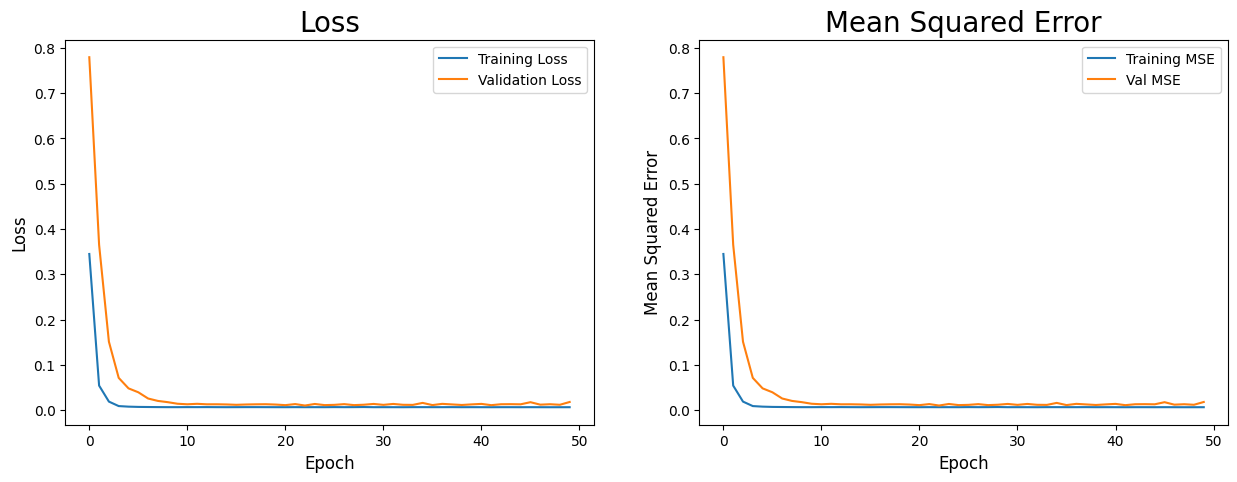

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Training Loss','Validation Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MSE
ax2.plot(history.history['mse'])
ax2.plot(history.history['val_mse'])
ax2.legend(['Training MSE','Val MSE'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Squared Error', fontsize=12)
ax2.set_title('Mean Squared Error', fontsize=20)
plt.show()

In [ ]:
pred_train_biasa=model.predict(x_train)
pred_train_biasa

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


array([[-1.4666953],
       [-1.4951358],
       [-1.4898078],
       ...,
       [ 1.2776351],
       [ 1.2988068],
       [ 1.3470836]], dtype=float32)

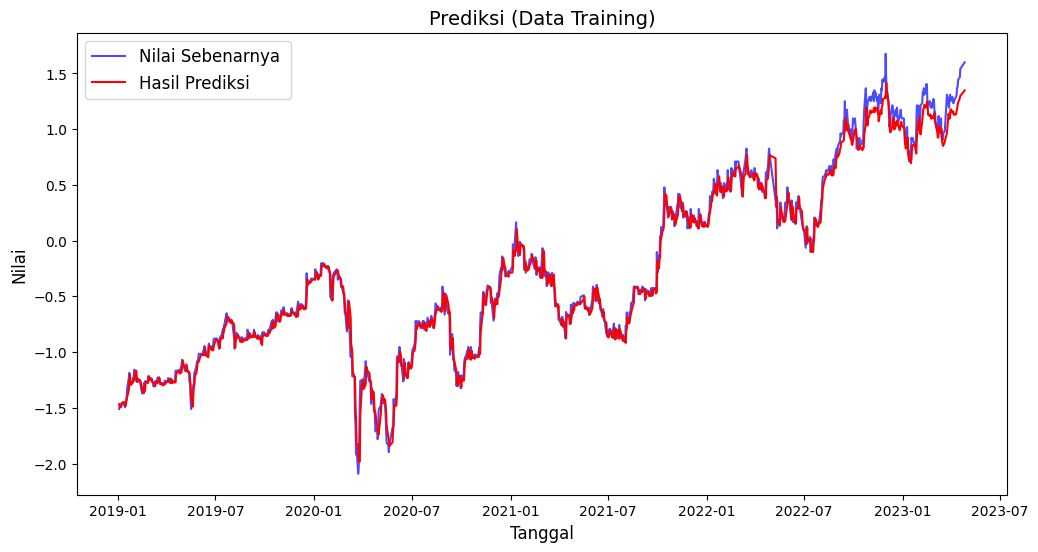

In [ ]:
plot_prediction_train(y_train,pred_train_biasa)

**Testing**

In [ ]:
pred_test_biasa=model.predict(x_valid)
pred_test_biasa

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


array([[1.3928387],
       [1.3801165],
       [1.3293045],
       [1.3165741],
       [1.2595071],
       [1.2776352],
       [1.2874148],
       [1.2874148],
       [1.2529583],
       [1.2430651],
       [1.1963216],
       [1.1709492],
       [1.1556243],
       [1.1161476],
       [1.1418225],
       [1.2578235],
       [1.2874148],
       [1.3439057],
       [1.3148546],
       [1.3133678],
       [1.3613836],
       [1.3739104],
       [1.4177619],
       [1.3418827],
       [1.3835053],
       [1.3801165],
       [1.3517015],
       [1.3565598],
       [1.3485587],
       [1.367666 ],
       [1.3739104],
       [1.3405265],
       [1.3197708],
       [1.3165741],
       [1.2938875],
       [1.3101519],
       [1.3502517],
       [1.3261361],
       [1.3165741],
       [1.327847 ],
       [1.3645296],
       [1.3405265],
       [1.3197708],
       [1.3165741],
       [1.327847 ],
       [1.3084637],
       [1.3133678],
       [1.3052542],
       [1.3693252],
       [1.36595  ],


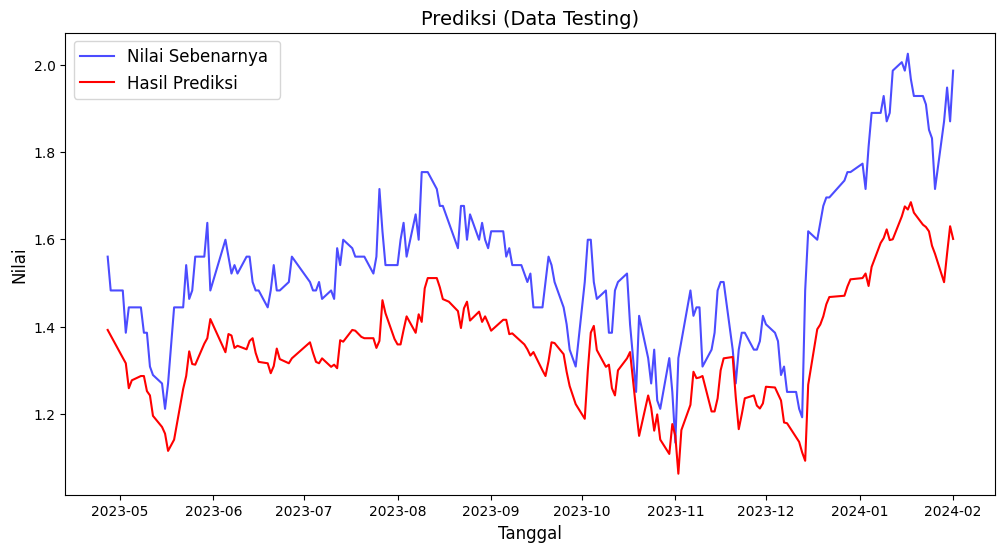

In [ ]:
# Panggil fungsi plot_prediction untuk set test
plot_prediction_test(y_valid, pred_test_biasa)

# Model Terbaik LSTM-GWO

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
lstm_gwo = Sequential()
lstm_gwo.add(LSTM(256, input_shape=(x_train.shape[1],1), return_sequences=False))
lstm_gwo.add(Dense(1))

optimizer = Adam(learning_rate=0.00075)
lstm_gwo.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mse'])

history_1 = lstm_gwo.fit(x_train, y_train, validation_split=0.15, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.4842 - mse: 0.4842 - val_loss: 0.6555 - val_mse: 0.6555
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0592 - mse: 0.0592 - val_loss: 0.2708 - val_mse: 0.2708
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0158 - mse: 0.0158 - val_loss: 0.0933 - val_mse: 0.0933
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.0437 - val_mse: 0.0437
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0064 - mse: 0.0064 - val_loss: 0.0338 - val_mse: 0.0338
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0058 - mse: 0.0058 - val_loss: 0.0268 - val_mse: 0.0268
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0084 - mse: 0.0084 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0066 - mse: 0.0066 - val_loss: 0.0141 - val_mse: 0.0141
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0066 - mse: 0.

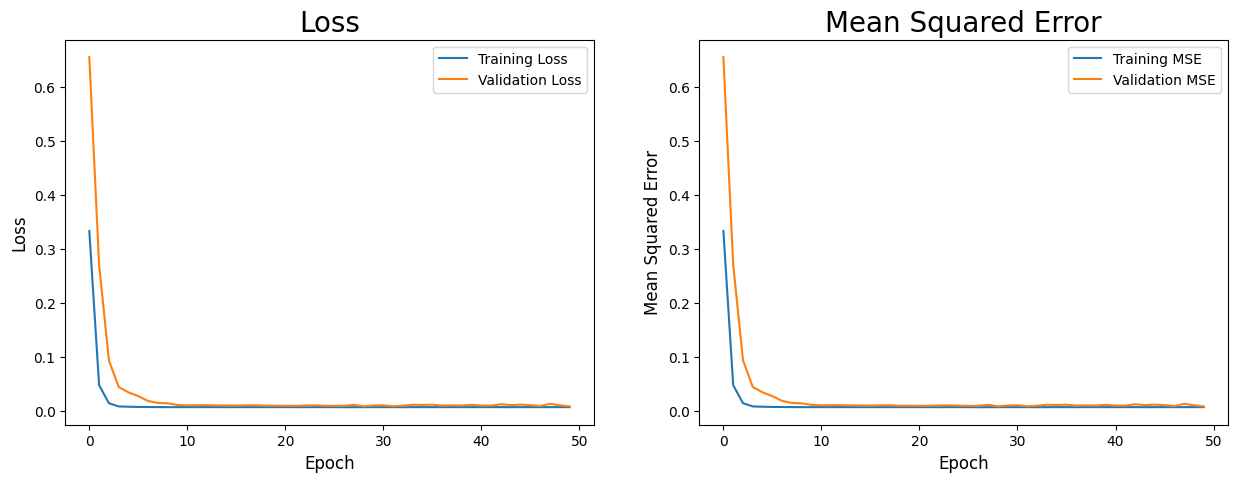

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history_1.history['loss'])
ax1.plot(history_1.history['val_loss'])
ax1.legend(['Training Loss','Validation Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MSE
ax2.plot(history_1.history['mse'])
ax2.plot(history_1.history['val_mse'])
ax2.legend(['Training MSE','Validation MSE'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Squared Error', fontsize=12)
ax2.set_title('Mean Squared Error', fontsize=20)
plt.show()

**Training Prediction**

In [ ]:
pred_train_lstmgwo=lstm_gwo.predict(x_train)
pred_train_lstmgwo

34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[-1.4942143],
       [-1.5269612],
       [-1.5189464],
       ...,
       [ 1.3936303],
       [ 1.4158369],
       [ 1.4740176]], dtype=float32)

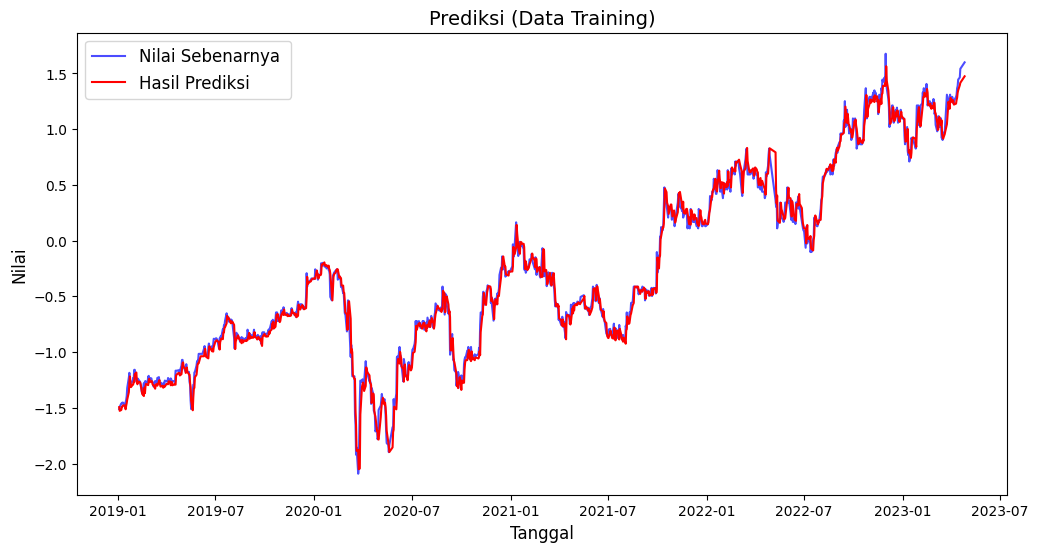

In [ ]:
# Panggil fungsi plot_prediction untuk set test
plot_prediction_train(y_train, pred_train_lstmgwo)

**Testing Prediction**

In [ ]:
pred_test_lstmgwo=lstm_gwo.predict(x_valid)
pred_test_lstmgwo

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[1.5258021],
       [1.5063589],
       [1.445967 ],
       [1.4351904],
       [1.3652976],
       [1.3936305],
       [1.4018745],
       [1.4018745],
       [1.3597763],
       [1.3514476],
       [1.2947172],
       [1.2690724],
       [1.2518649],
       [1.2057183],
       [1.2403318],
       [1.3769724],
       [1.4018745],
       [1.4713297],
       [1.4294033],
       [1.4324801],
       [1.4904633],
       [1.5010865],
       [1.5556252],
       [1.4566407],
       [1.5178828],
       [1.5063589],
       [1.4735987],
       [1.4820428],
       [1.4709333],
       [1.4957879],
       [1.5010865],
       [1.4598007],
       [1.437894 ],
       [1.4351904],
       [1.4073393],
       [1.4297638],
       [1.4766991],
       [1.4432824],
       [1.4351904],
       [1.4490625],
       [1.4931288],
       [1.4598008],
       [1.437894 ],
       [1.4351904],
       [1.4490625],
       [1.4239959],
       [1.4324801],
       [1.4212825],
       [1.501529 ],
       [1.4900099],


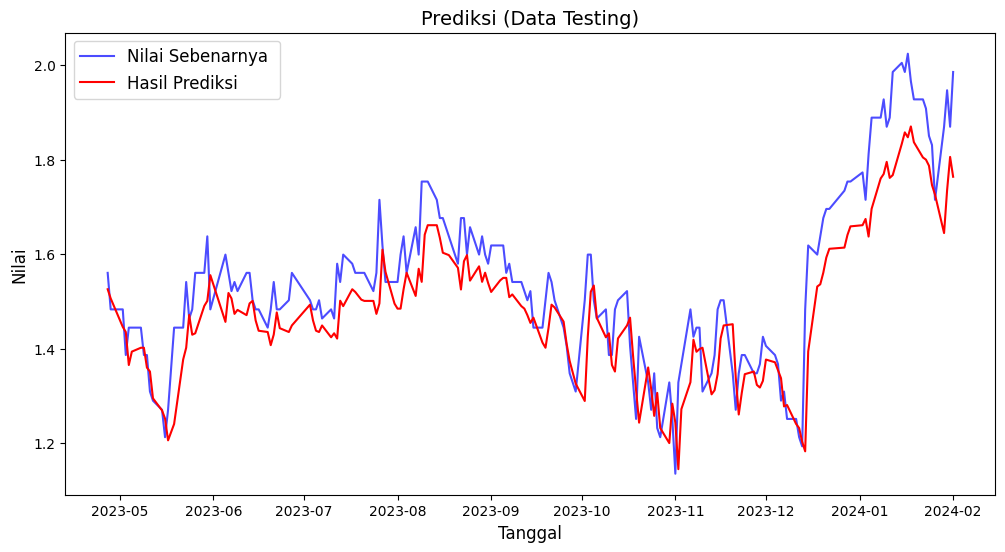

In [ ]:
# Panggil fungsi plot_prediction untuk set test
plot_prediction_test(y_valid, pred_test_lstmgwo)

# Model Evaluation

In [ ]:
## Inverse Transform Training
train_original=scaler.inverse_transform(np.array(y_train).reshape(-1,1))
train_biasa_original = scaler.inverse_transform(np.array(pred_train_biasa))
train_lstmgwo_original = scaler.inverse_transform(np.array(pred_train_lstmgwo))

In [ ]:
## Inverse Transform Testing
test_original=scaler.inverse_transform(np.array(y_valid).reshape(-1,1))
test_biasa_original = scaler.inverse_transform(np.array(pred_test_biasa))
test_lstmgwo_original = scaler.inverse_transform(np.array(pred_test_lstmgwo))



> Evaluasi Model LSTM Biasa



In [ ]:
mse_train_biasa=calculate_mse(train_original,train_biasa_original)
mape_train_biasa=calculate_mape(train_original,train_biasa_original)
mae_train_biasa=calculate_mae(train_original,train_biasa_original)

In [ ]:
mse_test_biasa=calculate_mse(test_original,test_biasa_original)
mape_test_biasa=calculate_mape(test_original,test_biasa_original)
mae_test_biasa=calculate_mae(test_original,test_biasa_original)



> Evaluasi Model LSTM-GWO



In [ ]:
mse_train_lstmgwo=calculate_mse(train_original,train_lstmgwo_original)
mape_train_lstmgwo=calculate_mape(train_original,train_lstmgwo_original)
mae_train_lstmgwo=calculate_mae(train_original,train_lstmgwo_original)

In [ ]:
mse_test_lstmgwo=calculate_mse(test_original,test_lstmgwo_original)
mape_test_lstmgwo=calculate_mape(test_original,test_lstmgwo_original)
mae_test_lstmgwo=calculate_mae(test_original,test_lstmgwo_original)

In [ ]:
print(mae_train_biasa,mse_train_biasa,mape_train_biasa)
print(mae_train_lstmgwo,mse_train_lstmgwo,mape_train_lstmgwo)

[3.32590396e-05] [99.71136733] [0.0033259]
[1.65134546e-05] [24.58108994] [0.00165135]


In [ ]:
print(mae_test_biasa,mse_test_biasa,mape_test_biasa)
print(mae_test_lstmgwo,mse_test_lstmgwo,mape_test_lstmgwo)

[0.00027289] [1317.27731682] [0.02728902]
[0.00015732] [437.80804107] [0.01573226]



*   Pake Package

# Prediction Comparison



> After Inverse



**Training**

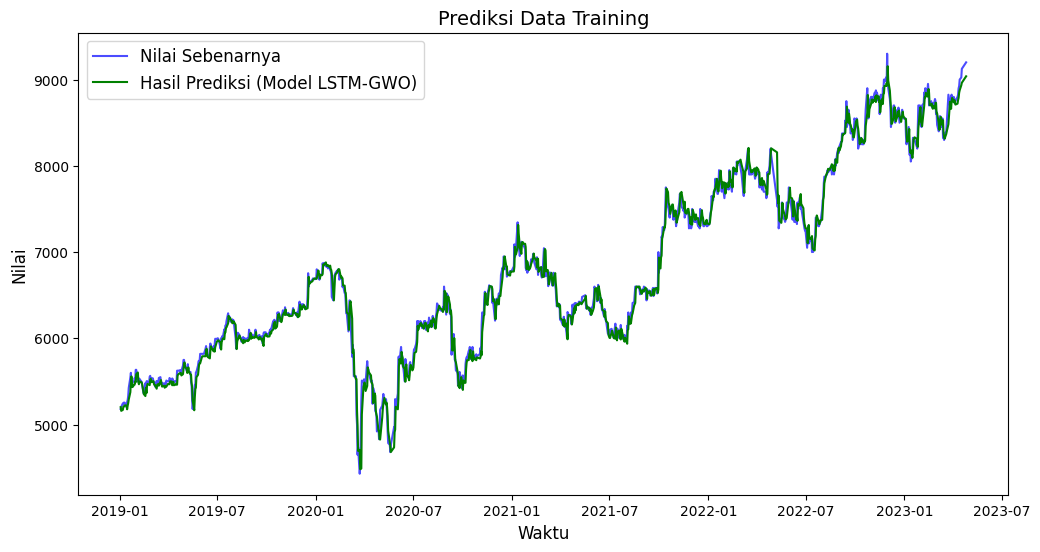

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_train.index,train_lstmgwo_original, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')
# Menambahkan judul dan label
plt.title(f'Prediksi Data Training', fontsize=14)
plt.xlabel('Waktu', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

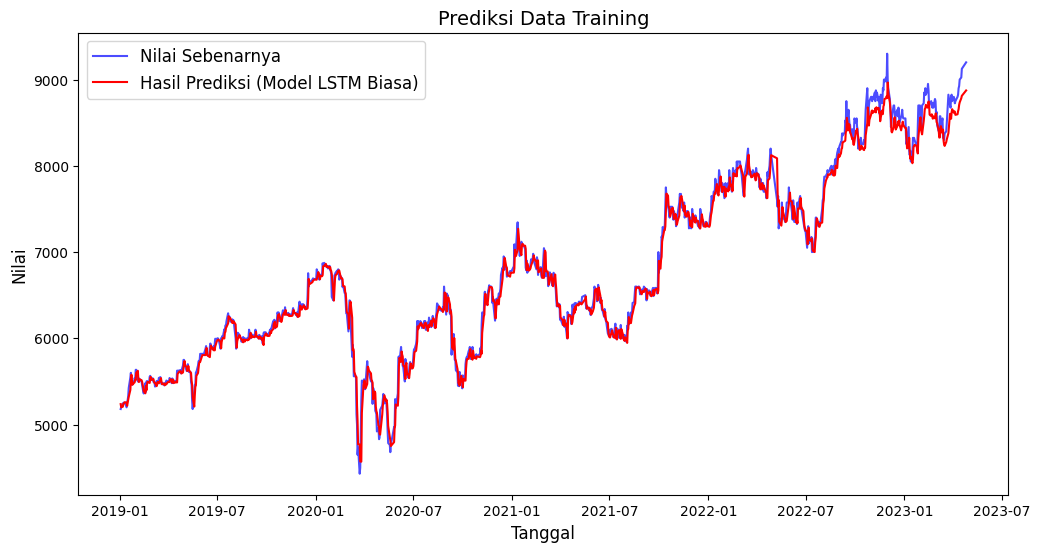

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_train.index,train_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')
# Menambahkan judul dan label
plt.title(f'Prediksi Data Training', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

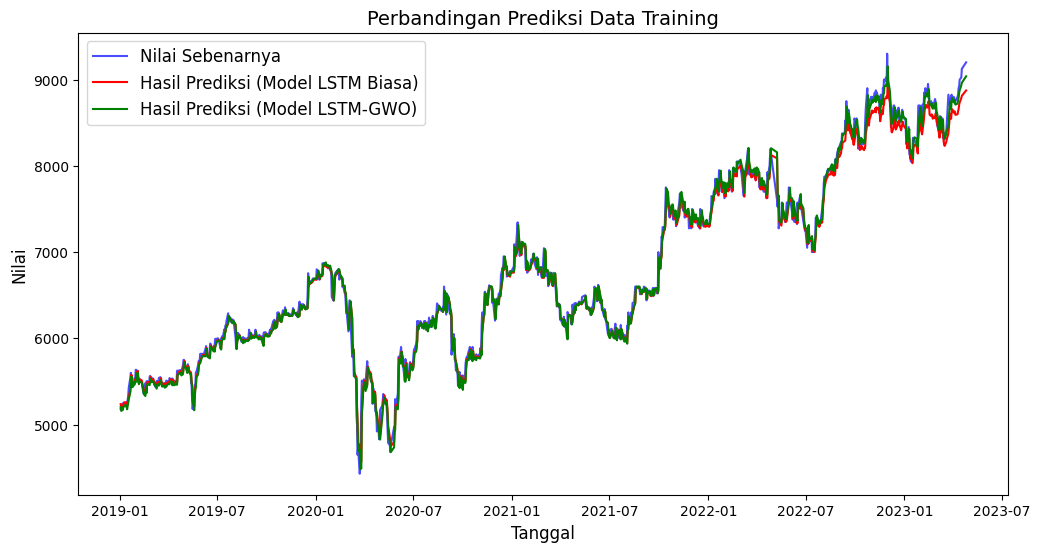

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_train.index,train_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_train.index,train_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Plot hasil prediksi dari model LSTM-GWO
plt.plot(y_train.index,train_lstmgwo_original, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Perbandingan Prediksi Data Training', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

**Testing**

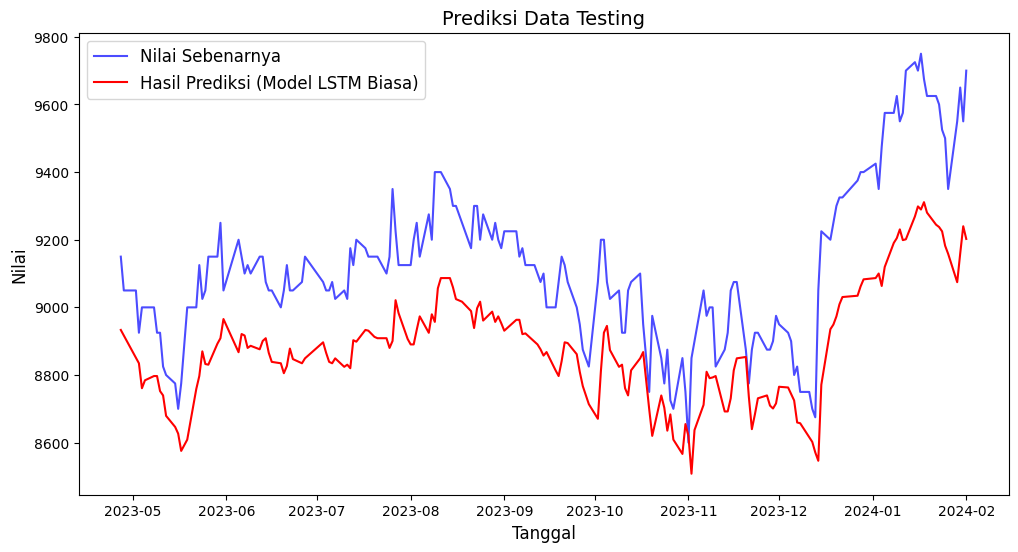

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_valid.index,test_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Menambahkan judul dan label
plt.title(f'Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

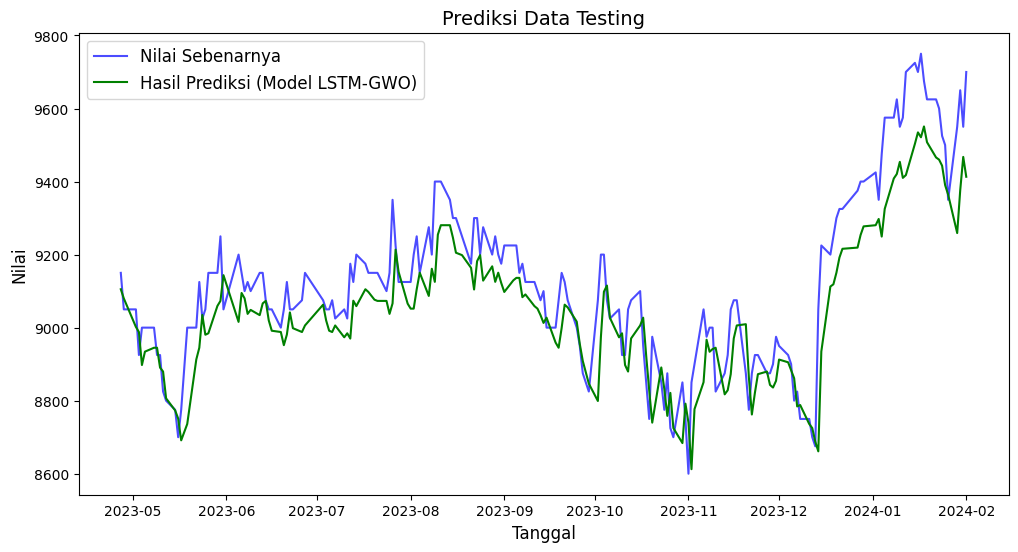

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_valid.index,test_lstmgwo_original, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

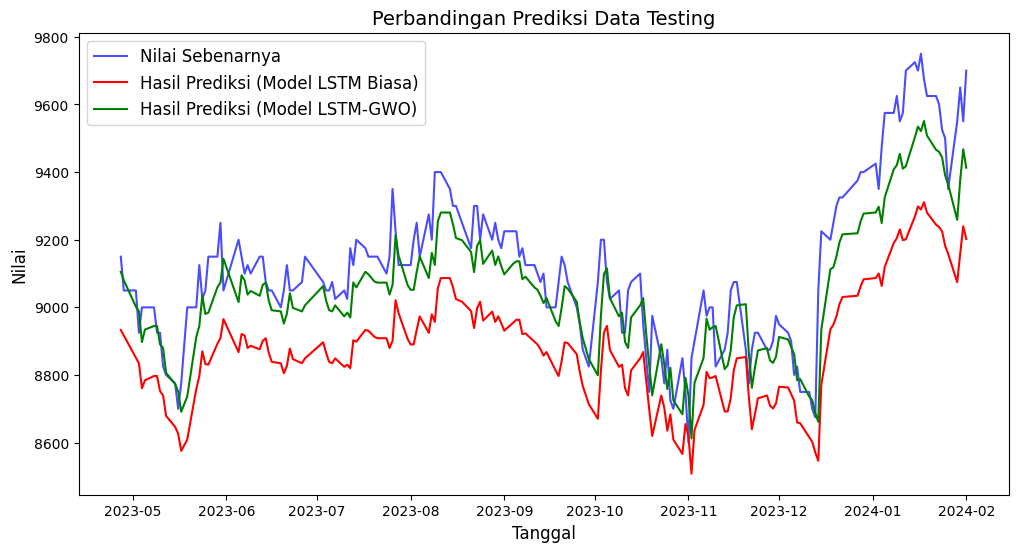

In [ ]:
plt.figure(figsize=(12, 6))

# Plot nilai sebenarnya
plt.plot(y_valid.index,test_original, label=f'Nilai Sebenarnya ', color='blue', alpha=0.7)

# Plot hasil prediksi dari model LSTM Biasa
plt.plot(y_valid.index,test_biasa_original, label=f'Hasil Prediksi (Model LSTM Biasa)', color='red')

# Plot hasil prediksi dari model LSTM-GWO
plt.plot(y_valid.index,test_lstmgwo_original, label=f'Hasil Prediksi (Model LSTM-GWO)', color='green')

# Menambahkan judul dan label
plt.title(f'Perbandingan Prediksi Data Testing', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Nilai', fontsize=12)

# Menambahkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()

In [ ]:
# Perulangan untuk memprediksi masa depan
steps = 50

for i in range(steps):
    # Mendapatkan indeks baru untuk baris yang akan ditambahkan
  new_dex = df_close.index[-1] + pd.DateOffset(days=1)

    # Membuat DataFrame baru dengan nilai NaN di kolom pertama dan nilai dari baris terakhir di kolom lainnya
  new_row = pd.DataFrame(
      [[np.nan,df_close['Close'].iloc[-1], df_close['lag_1'].iloc[-1]]],
      columns=df_close.columns,
      index=[new_dex]
    )

    # Menambahkan baris baru ke DataFrame
  df_close = pd.concat([df_close,new_row])

    # Melakukan prediksi dengan model untuk mengisi nilai NaN
  forecast = lstm_gwo.predict(df_close.iloc[[-1]].drop(columns=['Close']))
  df_close = df_close.fillna(forecast[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [ ]:
df_close

,Close,lag_1,lag_2
2019-01-03,-1.510855,-1.464437,-1.495383
2019-01-04,-1.491514,-1.510855,-1.464437
2019-01-07,-1.460569,-1.491514,-1.510855
2019-01-08,-1.464437,-1.460569,-1.491514
2019-01-09,-1.452832,-1.464437,-1.460569
...,...,...,...
2024-03-18,1.056993,1.058616,1.060354
2024-03-19,1.055475,1.056993,1.058616
2024-03-20,1.054058,1.055475,1.056993
2024-03-21,1.052732,1.054058,1.055475


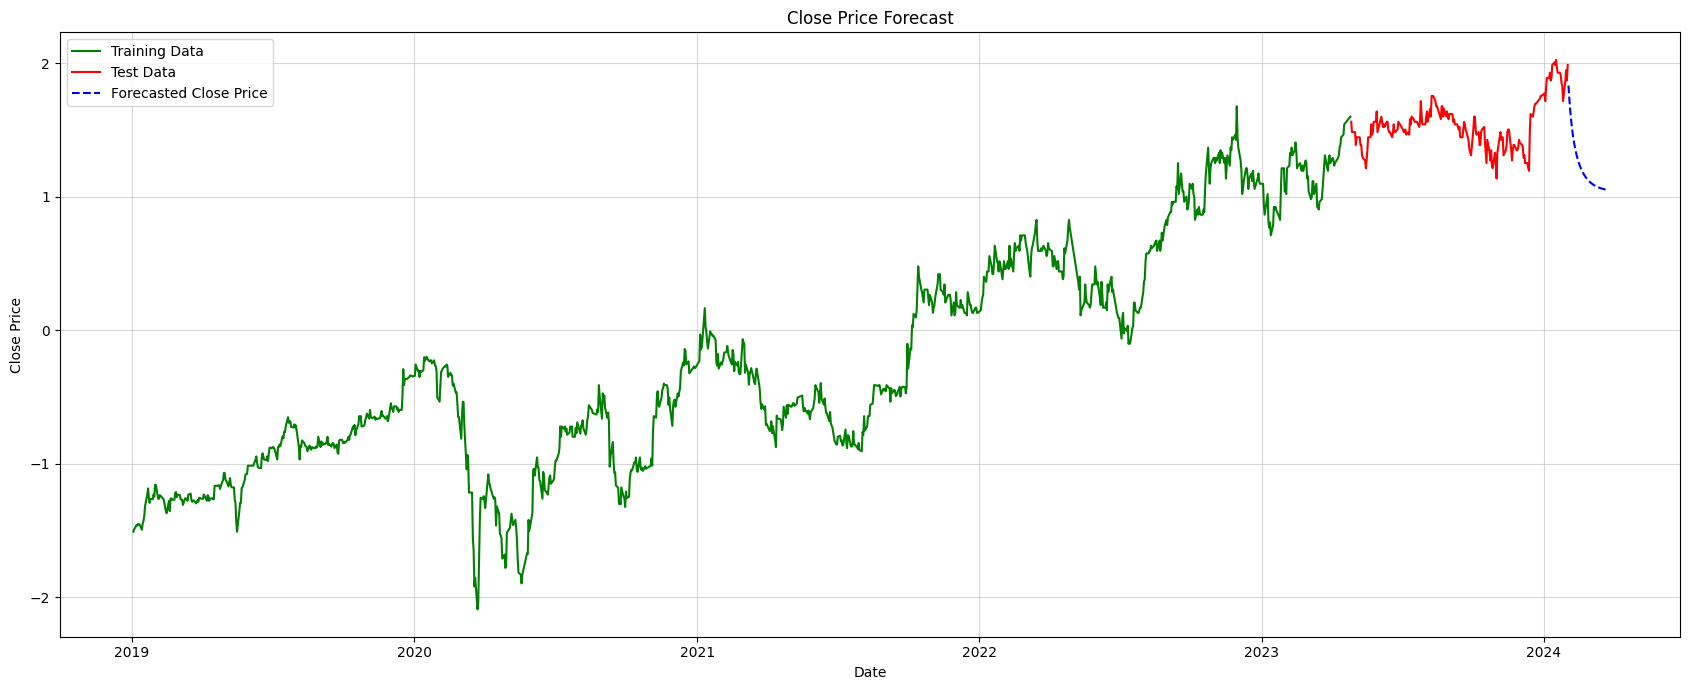

In [ ]:
##Memilih 365 baris terakhir dari kolom 'close'
historical = df_close[['Close']].iloc[-730-steps:-steps]
forecast = df_close[['Close']].iloc[-steps:]

# Membuat plot untuk visualisasi data 'close'
plt.figure(figsize=(17, 7))

# Plot garis untuk data historis
plt.plot(data_train.index    , data_train['Close']   , label='Training Data', color='green')
plt.plot(data_valid.index     , data_valid['Close']    , label='Test Data'    , color='red')

# Plot garis untuk forecast dengan garis putus-putus
plt.plot(forecast.index, forecast['Close'], label='Forecasted Close Price', color='blue', linestyle="--")

# Menambahkan judul dan label sumbu
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True, alpha=0.5, zorder=10)
plt.tight_layout()

# Menampilkan plot
plt.show()

In [ ]:
print(len(forecast))

50
